In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
import datetime
import statsmodels.api as sm
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
sns.set(color_codes=True)

In [2]:
columns = ["aid", "ifexist", "videos", "tname",
               "pubdate", "view", "danmaku", "reply",
               "favorite", "coin", "share", "now_rank",
               "his_rank", "like", "dislike", "duration"]

data = pd.read_csv('FinalResult.csv', sep=",", encoding='utf-8-sig', header=None,  names=columns)
"""data.fillna(value=0)"""
data.head()

,aid,ifexist,videos,tname,pubdate,view,danmaku,reply,favorite,coin,share,now_rank,his_rank,like,dislike,duration
0,231,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,396,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,513,1,1,短片·手书·配音,1.253148e+09,2518.0,18.0,60.0,53.0,3.0,4.0,0.0,0.0,3.0,0.0,20.0
3,659,1,1,单机联机,1.255681e+09,1343.0,9.0,28.0,13.0,5.0,4.0,0.0,0.0,0.0,0.0,257.0
4,702,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data['pubdate'] = data['pubdate'].replace(data['pubdate'][0],0)
data['pubdate'] = data['pubdate'].astype(int)
#data1['pubdate'] = data1['pubdate'].replace(0,'NaN')
data['pubdate']=pd.to_datetime(data['pubdate'], unit='s')
def f(x):
  return x.strftime('%Y-%m')
data['pubdate'] = data['pubdate'].apply(f)

In [4]:
data.head()

,aid,ifexist,videos,tname,pubdate,view,danmaku,reply,favorite,coin,share,now_rank,his_rank,like,dislike,duration
0,231,0,0,NaN,1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,396,0,0,NaN,1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,513,1,1,短片·手书·配音,2009-09,2518.0,18.0,60.0,53.0,3.0,4.0,0.0,0.0,3.0,0.0,20.0
3,659,1,1,单机联机,2009-10,1343.0,9.0,28.0,13.0,5.0,4.0,0.0,0.0,0.0,0.0,257.0
4,702,0,0,NaN,1970-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
uploaddata = data.groupby('pubdate').sum()['videos'][5:-1].reset_index()

In [0]:
up = list(uploaddata['videos'])

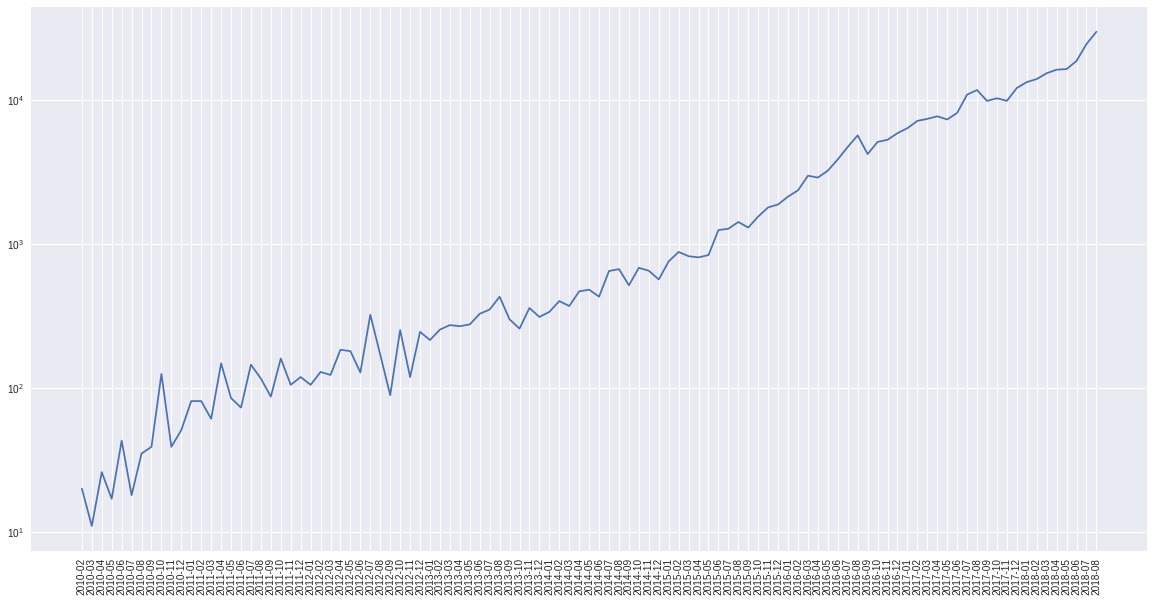

In [60]:
t1 = plt.figure(figsize=(20,10))
t1 = plt.plot(uploaddata['pubdate'],uploaddata['videos'])
t1 = plt.yscale('log',basey=10)
t1 = plt.xticks(rotation='vertical')

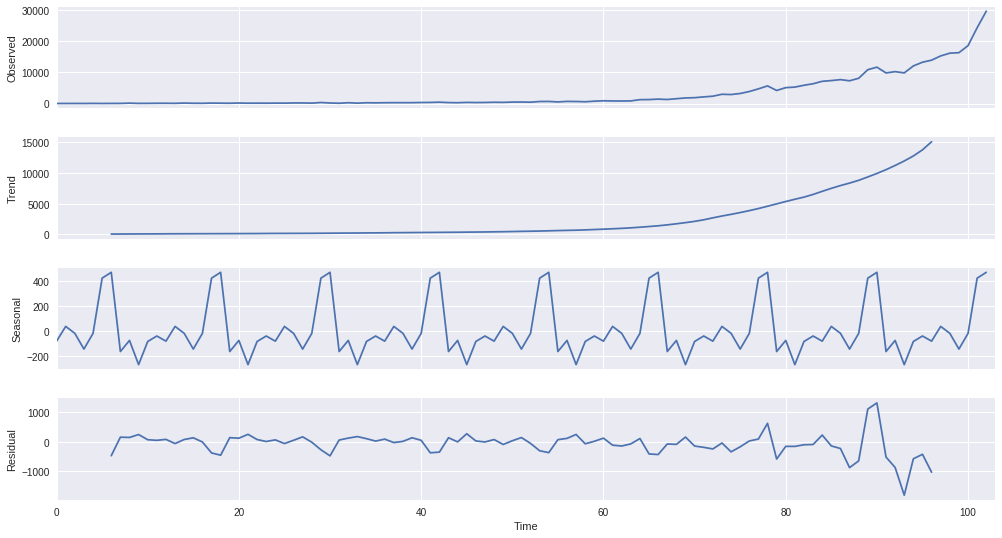

In [61]:
decomposition = seasonal_decompose(up, freq = 12)  
fig = plt.figure()  
fig = decomposition.plot() 
fig.set_size_inches(15, 8)

In [0]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


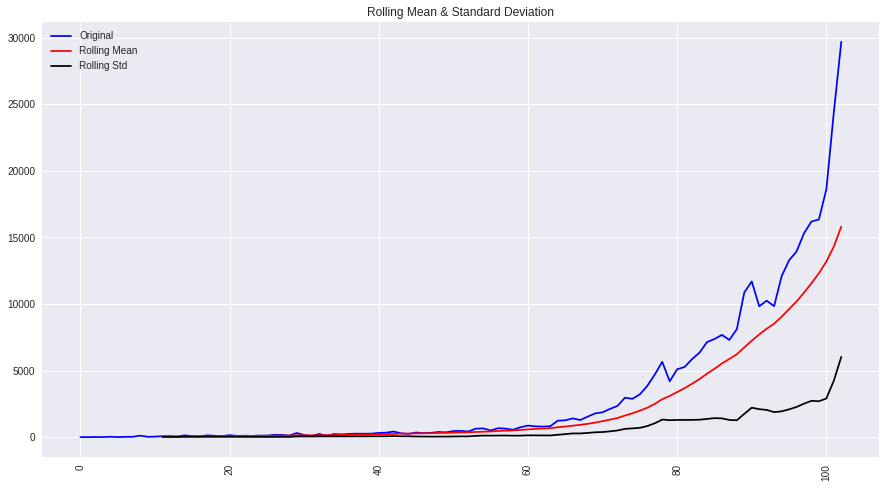

Results of Dickey-Fuller Test:
Test Statistic                  2.087779
p-value                         0.998777
#Lags Used                     13.000000
Number of Observations Used    89.000000
Critical Value (1%)            -3.506057
Critical Value (5%)            -2.894607
Critical Value (10%)           -2.584410
dtype: float64


In [63]:
from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(15, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    t = plt.xticks(rotation='vertical')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(uploaddata['videos'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


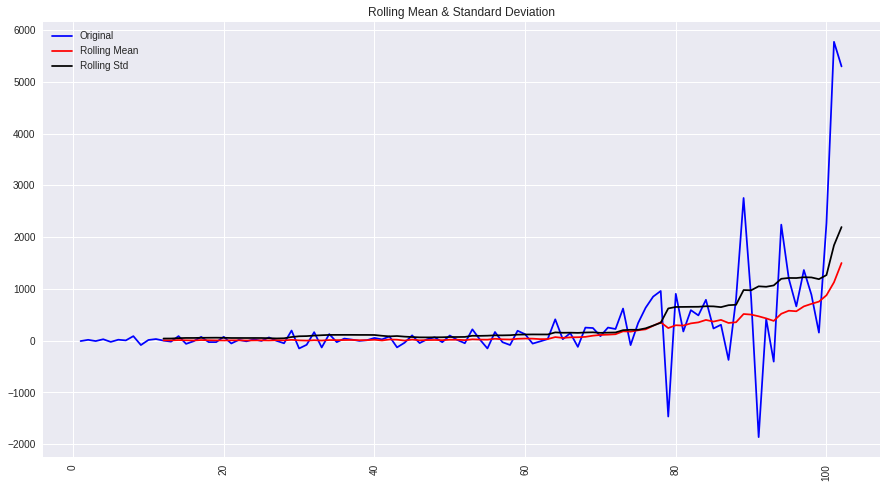

Results of Dickey-Fuller Test:
Test Statistic                  4.581958
p-value                         1.000000
#Lags Used                     13.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [64]:
uploaddata['first_difference'] = uploaddata['videos'] - uploaddata['videos'].shift(1)    #也可以使用diff()
test_stationarity(uploaddata.first_difference.dropna(inplace=False))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


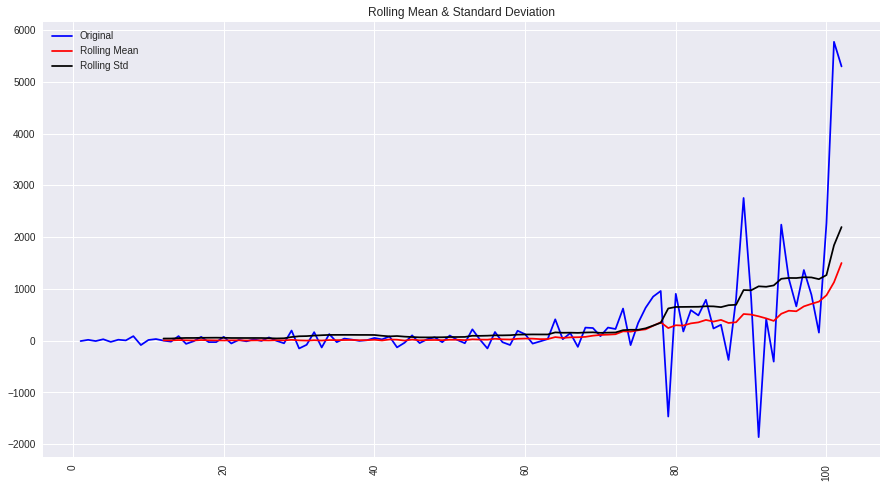

Results of Dickey-Fuller Test:
Test Statistic                  4.581958
p-value                         1.000000
#Lags Used                     13.000000
Number of Observations Used    88.000000
Critical Value (1%)            -3.506944
Critical Value (5%)            -2.894990
Critical Value (10%)           -2.584615
dtype: float64


In [65]:
uploaddata['seasonal_difference'] = uploaddata['videos'] - uploaddata['videos'].shift(12)    #也可以使用diff()
test_stationarity(uploaddata.first_difference.dropna(inplace=False))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


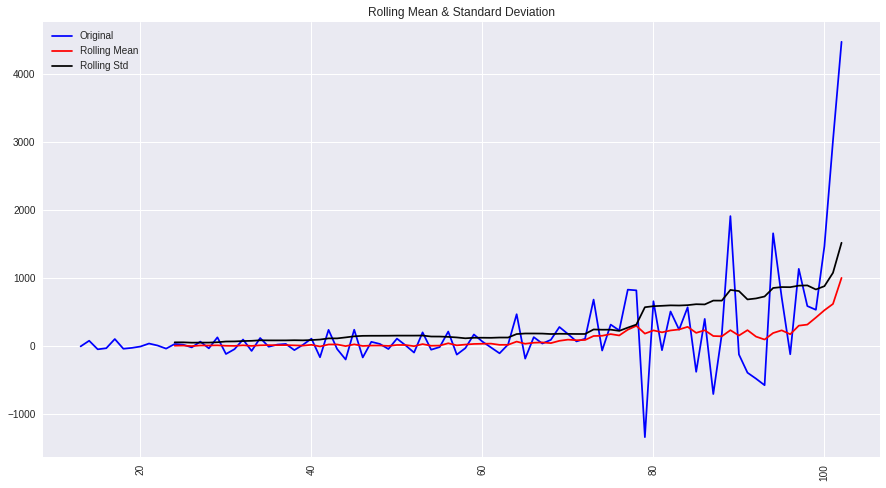

Results of Dickey-Fuller Test:
Test Statistic                  1.143136
p-value                         0.995568
#Lags Used                     10.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


In [66]:
uploaddata['seasonal_first_difference'] = uploaddata.first_difference - uploaddata.first_difference.shift(12)  
test_stationarity(uploaddata.seasonal_first_difference.dropna(inplace=False))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


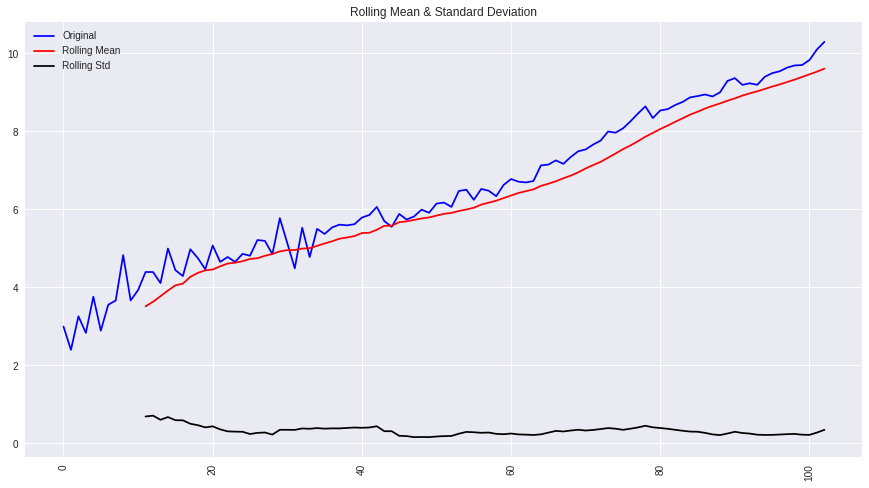

Results of Dickey-Fuller Test:
Test Statistic                  -0.273365
p-value                          0.929193
#Lags Used                       2.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64


In [67]:
uploaddata['videos_log']= uploaddata['videos'].apply(lambda x: np.log(x))  
test_stationarity(uploaddata['videos_log'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


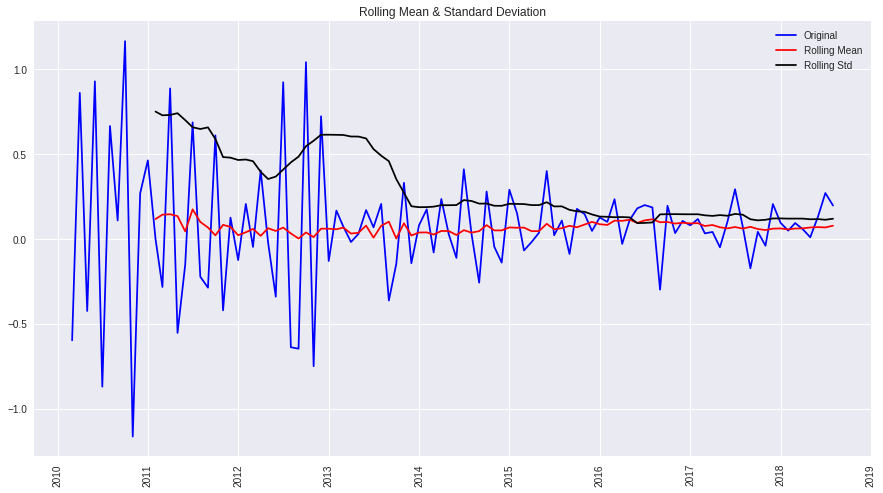

Results of Dickey-Fuller Test:
Test Statistic                -1.334354e+01
p-value                        5.855548e-25
#Lags Used                     1.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [123]:
uploaddata['log_first_difference'] = uploaddata['videos_log'] - uploaddata['videos_log'].shift(1)
test_stationarity(uploaddata.log_first_difference.dropna(inplace=False))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


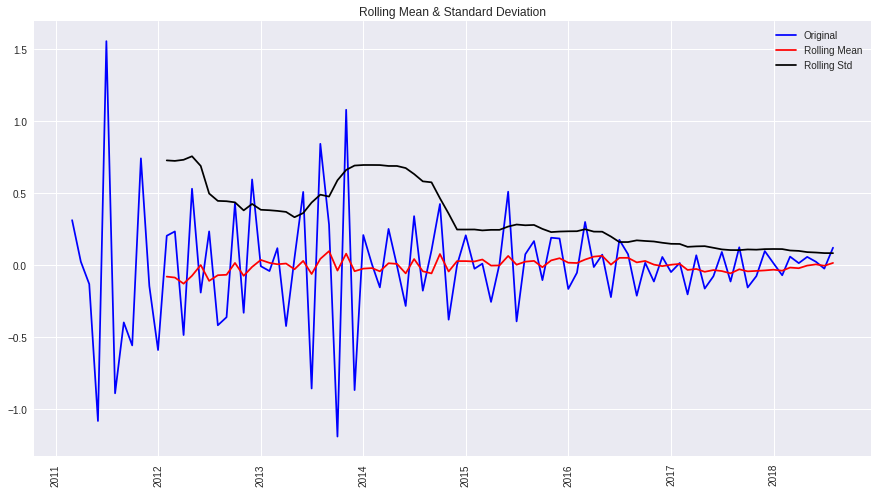

Results of Dickey-Fuller Test:
Test Statistic                -6.960388e+00
p-value                        9.196823e-10
#Lags Used                     3.000000e+00
Number of Observations Used    8.600000e+01
Critical Value (1%)           -3.508783e+00
Critical Value (5%)           -2.895784e+00
Critical Value (10%)          -2.585038e+00
dtype: float64


In [125]:
uploaddata['log_seasonal_difference'] = uploaddata['log_first_difference'] - uploaddata['log_first_difference'].shift(12)
test_stationarity(uploaddata.log_seasonal_difference.dropna(inplace=False))

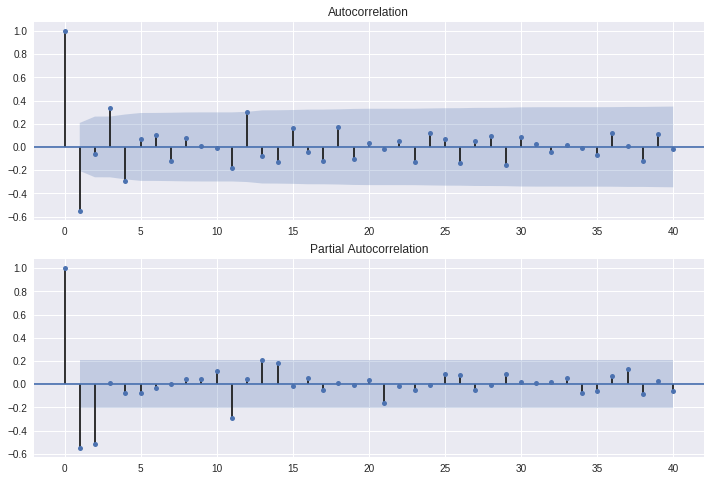

In [69]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(uploaddata['log_first_difference'].iloc[13:], lags=40, ax=ax1) #从13开始是因为做季节性差分时window是12
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(uploaddata['log_first_difference'].iloc[13:], lags=40, ax=ax2)

In [70]:
start = datetime.datetime.strptime("2010-02-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,103)]
uploaddata['index'] = date_list
uploaddata.set_index(['index'], inplace=True)
mod = sm.tsa.statespace.SARIMAX(uploaddata['videos_log'], trend='n', order=(1,1,0), seasonal_order=(1,1,0,12))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                         videos_log   No. Observations:                  103
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                 -25.028
Date:                            Tue, 09 Oct 2018   AIC                             56.056
Time:                                    17:45:20   BIC                             63.960
Sample:                                02-01-2010   HQIC                            59.257
                                     - 08-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5565      0.064     -8.701      0.000      -0.682      -0.431
ar.S.L12      -0.3426      0.081   

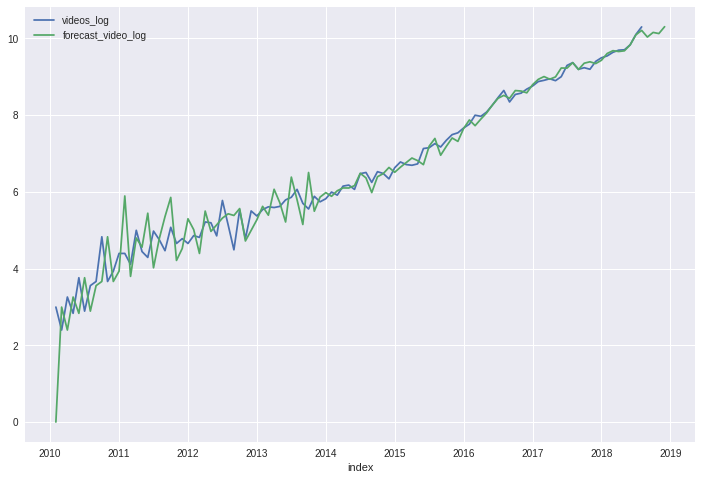

In [103]:
forecast_log = results.predict(dynamic= False, start = 0, end = 106)  
uploaddata[['videos_log']].plot(figsize=(12, 8), label = 'video_log')
forecast_log.plot(figsize=(12, 8), label = 'forecast_video_log')
plt.legend()

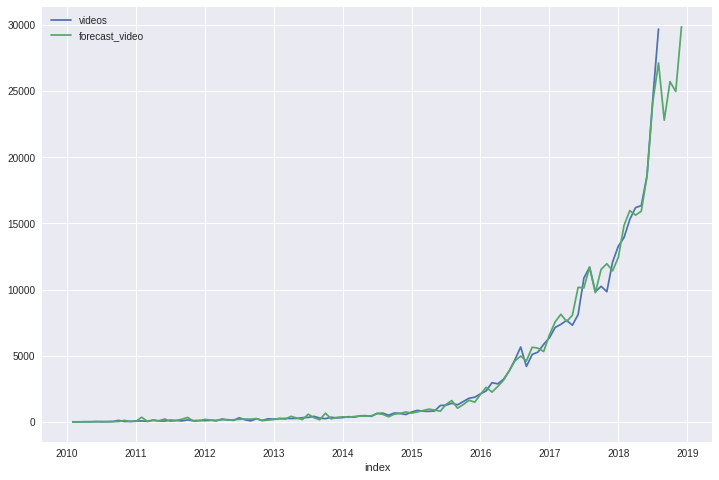

In [104]:
forecast = forecast_log.apply(math.exp)
uploaddata[['videos']].plot(figsize=(12, 8),  label = 'video')
forecast.plot(figsize=(12, 8),  label = 'forecast_video')
plt.legend()

In [118]:
(sum((uploaddata['videos'] - forecast[0:103])**2)/uploaddata.shape[0])**0.5

492.2350864792924

In [22]:
uploaddata

,pubdate,videos,first_difference,seasonal_difference,seasonal_first_difference,videos_log,log_first_difference,forecast
pubdate,,,,,,,,
2010-02,2010-02,20,NaN,NaN,NaN,2.995732,NaN,NaN
2010-03,2010-03,11,-9.0,NaN,NaN,2.397895,-0.597837,NaN
2010-04,2010-04,26,15.0,NaN,NaN,3.258097,0.860201,NaN
2010-05,2010-05,17,-9.0,NaN,NaN,2.833213,-0.424883,NaN
2010-06,2010-06,43,26.0,NaN,NaN,3.761200,0.927987,NaN
2010-07,2010-07,18,-25.0,NaN,NaN,2.890372,-0.870828,NaN
2010-08,2010-08,35,17.0,NaN,NaN,3.555348,0.664976,NaN
2010-09,2010-09,39,4.0,NaN,NaN,3.663562,0.108214,NaN
2010-10,2010-10,125,86.0,NaN,NaN,4.828314,1.164752,NaN


In [23]:
import time
time.strptime('2018-01',"%Y-%m")

time.struct_time(tm_year=2018, tm_mon=1, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=1, tm_isdst=-1)